In [13]:
import pandas as pd
import matplotlib.pyplot as plt

## Data examination

In [84]:
bsm_data = pd.read_csv('data/train/bsm_data_train.csv')
bsm_data.head()

,ident_bag,i_id,pax_id_hash,MessageReceivedDate,MessageProcessedDate,DateEvent,TagNumber,local_or_transfer
0,62562416,8628981.0,dcd856b334b9685c4f21afa67f3ddc70,2023-07-01 06:53:34.413,2023-07-01 06:53:37.720,2023-07-01 06:53:37.717,2425399448,L
1,62571791,8628981.0,dcd856b334b9685c4f21afa67f3ddc70,2023-07-01 06:53:24.603,2023-07-01 06:53:28.590,2023-07-01 06:53:28.577,2425388102,L
2,62553945,8629051.0,f2b931876cac089c6a02af1b70d08c61,2023-07-01 06:59:56.263,2023-07-01 06:59:59.610,2023-07-01 06:59:59.607,3555170959,L
3,62553945,8629051.0,f2b931876cac089c6a02af1b70d08c61,2023-07-01 06:59:57.083,2023-07-01 06:59:59.750,2023-07-01 06:59:59.747,3555170959,L
4,62574680,8629296.0,2e3291401628ca69061c49b3319793a1,2023-07-01 14:34:52.870,2023-07-01 14:34:55.547,2023-07-01 14:34:55.543,2316437470,L


In [85]:
flight_rasp = pd.read_csv('data/train/flight_rasp_data.csv')
flight_rasp.head()

,i_id,departure_terminal,checkin_terminal,airline_grouped_hash,cco_hash,flt_hash,t_st,m_city_rus1,m_city_rus2,config
0,8634957.0,B,B,7bac920cc30511dfb81ca2242b293990,f7adf0ba18d705092fa0a1e2f2c0bafb,6a2feef8ed6a9fe76d6b3f30f02150b4,2023-07-08 00:05:00,Москва,Челябинск,156
1,8634958.0,C,C,3ab7806fac7c2de105704d4ff29dd581,3ab7806fac7c2de105704d4ff29dd581,58d4d1e7b1e97b258c9ed0b37e02d087,2023-07-08 00:05:00,Москва,Шарм-эль-Шейх,202
2,8634961.0,B,B,7bac920cc30511dfb81ca2242b293990,f7adf0ba18d705092fa0a1e2f2c0bafb,471c75ee6643a10934502bdafee198fb,2023-07-08 00:10:00,Москва,Горно-Алтайск,158
3,8634962.0,B,B,7bac920cc30511dfb81ca2242b293990,f7adf0ba18d705092fa0a1e2f2c0bafb,9adeb82fffb5444e81fa0ce8ad8afe7a,2023-07-08 00:10:00,Москва,Казань,156
4,8634963.0,B,B,7bac920cc30511dfb81ca2242b293990,f7adf0ba18d705092fa0a1e2f2c0bafb,83cdcec08fbf90370fcf53bdd56604ff,2023-07-08 00:15:00,Москва,Абакан,196


In [86]:
print(min(flight_rasp.t_st))
print(max(flight_rasp.t_st))

2023-07-01 00:05:00
2023-09-12 23:55:00


In [87]:
rasp_train = flight_rasp.loc[flight_rasp.t_st < '2023-09-01 00:00:00.000000']
rasp_test = flight_rasp.loc[flight_rasp.t_st >= '2023-09-01 00:00:00.000000']

In [88]:
print(min(rasp_test.t_st))
print(max(rasp_test.t_st))

2023-09-01 00:05:00
2023-09-12 23:55:00


In [89]:
profile_data = pd.read_csv('data/train/arrival_profile_data.csv')
profile_data.head()

,ts,checkin_terminal,airline_grouped_hash,pax_arrival_profile
0,2023-06-15 00:00:00.000 +0300,C,100d796971d49bd1046f553b9b942ae7,0.0
1,2023-06-15 00:00:00.000 +0300,B,bbd97b00c539801e32317ab550867ec4,0.0
2,2023-06-15 00:00:00.000 +0300,C,35b5282113b88c2fe23dcbec9f0258c1,0.0
3,2023-06-15 00:00:00.000 +0300,C,d0b1bfd50dd40176f497a2915a6e579b,0.0
4,2023-06-15 00:00:00.000 +0300,B,7f58de3a72e00a866a762143cd799b49,0.0


In [90]:
profile_value = pd.read_csv('data/train/arrival_profile_value.csv')
profile_value.head()

,checkin_terminal,airline_grouped_hash,arrival_profile,value,season
0,B,7bac920cc30511dfb81ca2242b293990,180.0,0.008569,S23
1,B,7bac920cc30511dfb81ca2242b293990,185.0,0.008135,S23
2,B,7bac920cc30511dfb81ca2242b293990,190.0,0.007548,S23
3,B,7bac920cc30511dfb81ca2242b293990,195.0,0.007107,S23
4,B,7bac920cc30511dfb81ca2242b293990,200.0,0.006526,S23


In [91]:
bsm_data_test = pd.read_csv('data/test/bsm_data_test_outliers.csv')
bsm_data_test.head()

,ident_bag,i_id,pax_id_hash,MessageReceivedDate,MessageProcessedDate,DateEvent,TagNumber,local_or_transfer,MessageDelay
0,64614869,8687965.0,e2ba7d439b6454b5db814557b6496809,2023-09-01 08:11:29.673,2023-09-01 08:11:31.670,2023-09-01 08:11:31.660,555383942,L,1.997
1,64615238,8687811.0,445d35b0f6a1cb456ebee81f1f58a1d8,2023-09-01 05:18:09.487,2023-09-01 05:18:11.793,2023-09-01 05:18:11.790,555420816,L,2.306
2,64615238,8687811.0,445d35b0f6a1cb456ebee81f1f58a1d8,2023-09-01 05:18:27.383,2023-09-01 05:18:28.037,2023-09-01 05:18:28.030,555420816,L,0.654
3,64616157,8688043.0,47b752bd4462163554fc2bb0a11a0374,2023-09-01 00:00:00.520,2023-09-01 00:00:01.740,2023-09-01 00:00:01.730,555368361,T,1.220
4,64616158,8687750.0,73072927b6d484ee0a6f00fa362748ce,2023-09-01 00:00:03.373,2023-09-01 00:00:05.590,2023-09-01 00:00:05.587,263789488,L,2.217


## Converting bsm_data to proper format

In [92]:
#month
print(min(bsm_data.MessageReceivedDate))
print(max(bsm_data.MessageReceivedDate))

2023-07-01 00:00:04.433
2023-08-31 23:59:56.857


In [93]:
# Convert 'time' column to datetime format
bsm_data['MessageReceivedDate'] = pd.to_datetime(bsm_data['MessageReceivedDate'])

# Create a new column 'minute' that extracts minute part from 'time' column
bsm_data['minute'] = bsm_data['MessageReceivedDate'].apply(lambda x: x.floor(freq='min'))

# Group by 'minute' and count the number of occurrences
df_grouped = bsm_data.groupby('minute').count()
df_grouped['minute'] = df_grouped.index

df_grouped.head()

,ident_bag,i_id,pax_id_hash,MessageReceivedDate,MessageProcessedDate,DateEvent,TagNumber,local_or_transfer,minute
minute,,,,,,,,,
2023-07-01 00:00:00,16,16,16,16,16,16,16,16,2023-07-01 00:00:00
2023-07-01 00:01:00,29,29,29,29,29,29,29,29,2023-07-01 00:01:00
2023-07-01 00:02:00,16,16,16,16,16,16,16,16,2023-07-01 00:02:00
2023-07-01 00:03:00,21,21,21,21,21,21,21,21,2023-07-01 00:03:00
2023-07-01 00:04:00,18,18,18,18,18,18,18,18,2023-07-01 00:04:00


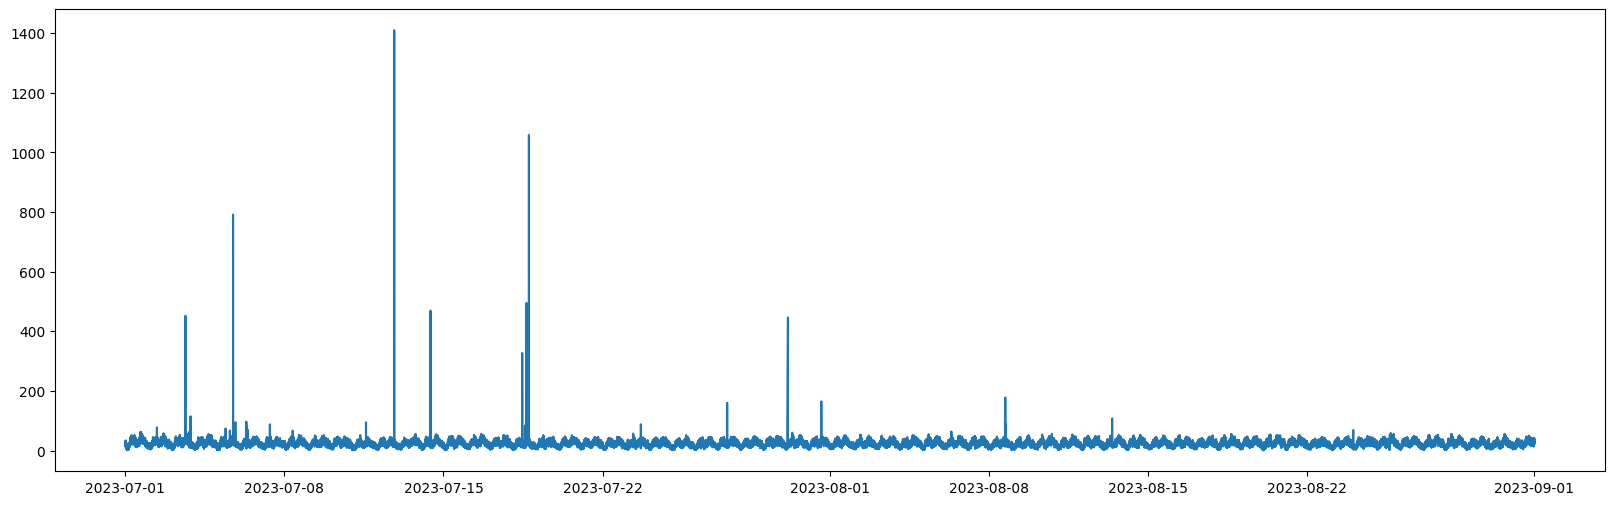

In [94]:
plt.figure(figsize=(20, 6))
plt.plot(df_grouped['minute'], df_grouped['i_id'])
plt.show()

## Converting bsm_data_test to proper format

In [95]:
#ten days interval
print(max(bsm_data_test.MessageReceivedDate))
print(min(bsm_data_test.MessageReceivedDate))

2023-09-10 23:59:59.010
2023-09-01 00:00:00.520


In [96]:
# Convert 'time' column to datetime format
bsm_data_test['MessageReceivedDate'] = pd.to_datetime(bsm_data_test['MessageReceivedDate'])

# Create a new column 'minute' that extracts minute part from 'time' column
bsm_data_test['minute'] = bsm_data_test['MessageReceivedDate'].apply(lambda x: x.floor(freq='min'))

# Group by 'minute' and count the number of occurrences
df_grouped_test = bsm_data_test.groupby('minute').count()
df_grouped_test['minute'] = df_grouped_test.index

df_grouped_test.head()

,ident_bag,i_id,pax_id_hash,MessageReceivedDate,MessageProcessedDate,DateEvent,TagNumber,local_or_transfer,MessageDelay,minute
minute,,,,,,,,,,
2023-09-01 00:00:00,23,23,23,23,23,23,23,23,23,2023-09-01 00:00:00
2023-09-01 00:01:00,26,26,26,26,26,26,26,26,26,2023-09-01 00:01:00
2023-09-01 00:02:00,22,22,22,22,22,22,22,22,22,2023-09-01 00:02:00
2023-09-01 00:03:00,26,26,26,26,26,26,26,26,26,2023-09-01 00:03:00
2023-09-01 00:04:00,25,25,25,25,25,25,25,25,25,2023-09-01 00:04:00


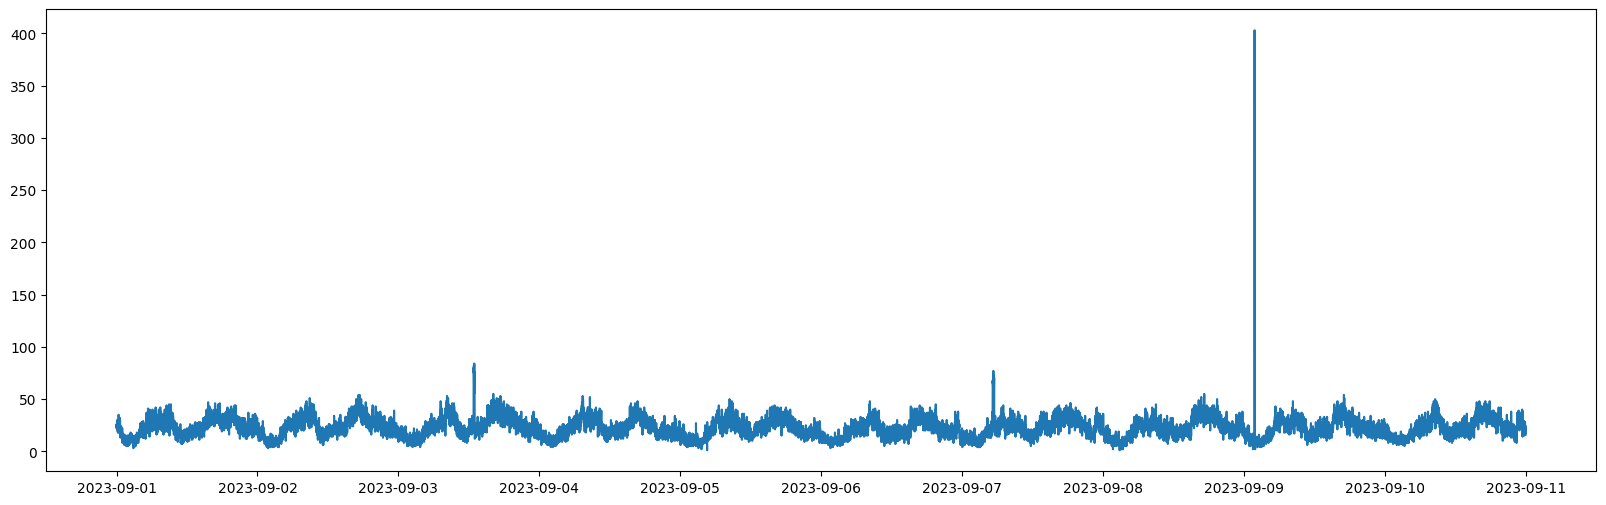

In [97]:
plt.figure(figsize=(20, 6))
plt.plot(df_grouped_test['minute'], df_grouped_test['i_id'])
plt.show()

### Examining anomalies 

In [98]:
first_anom = df_grouped_test.loc[(df_grouped_test['minute'] > pd.Timestamp('2023-09-03T12')) 
                            & (df_grouped_test['minute'] < pd.Timestamp('2023-09-03T14'))]

second_anom = df_grouped_test.loc[(df_grouped_test['minute'] > pd.Timestamp('2023-09-07T04')) 
                            & (df_grouped_test['minute'] < pd.Timestamp('2023-09-07T06'))]

third_anom = df_grouped_test.loc[(df_grouped_test['minute'] > pd.Timestamp('2023-09-09T01')) 
                            & (df_grouped_test['minute'] < pd.Timestamp('2023-09-09T02'))]

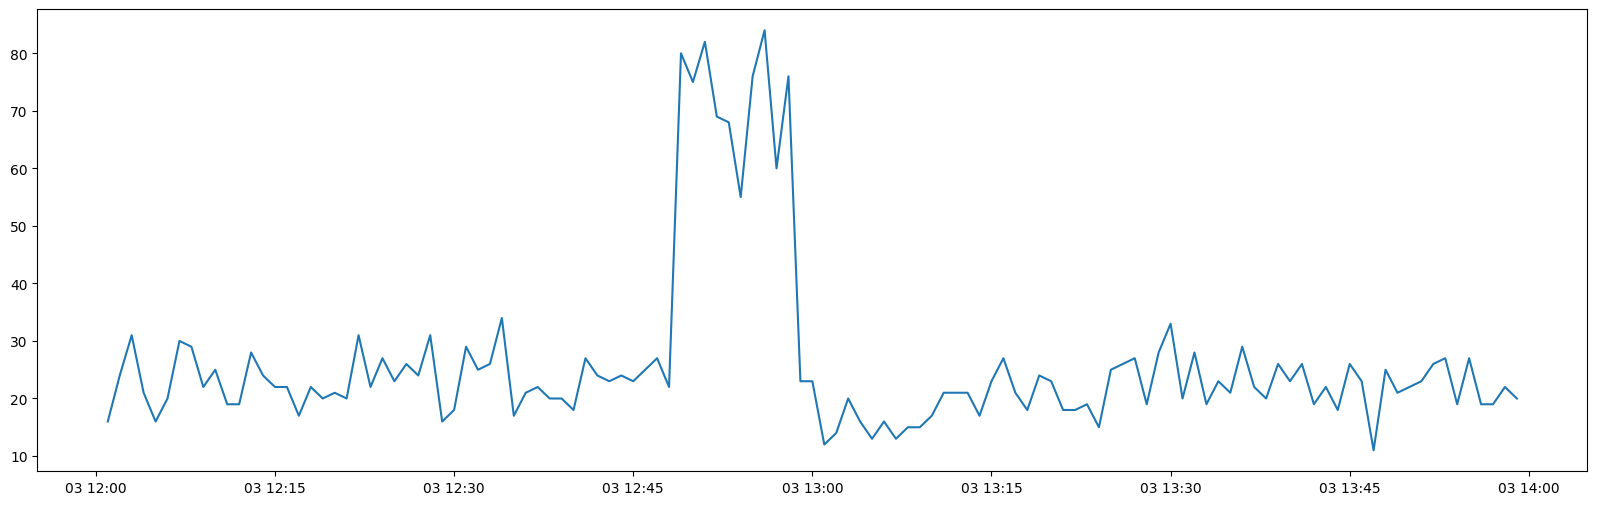

In [99]:
plt.figure(figsize=(20, 6))
plt.plot(first_anom['minute'], first_anom['i_id'])
plt.show()

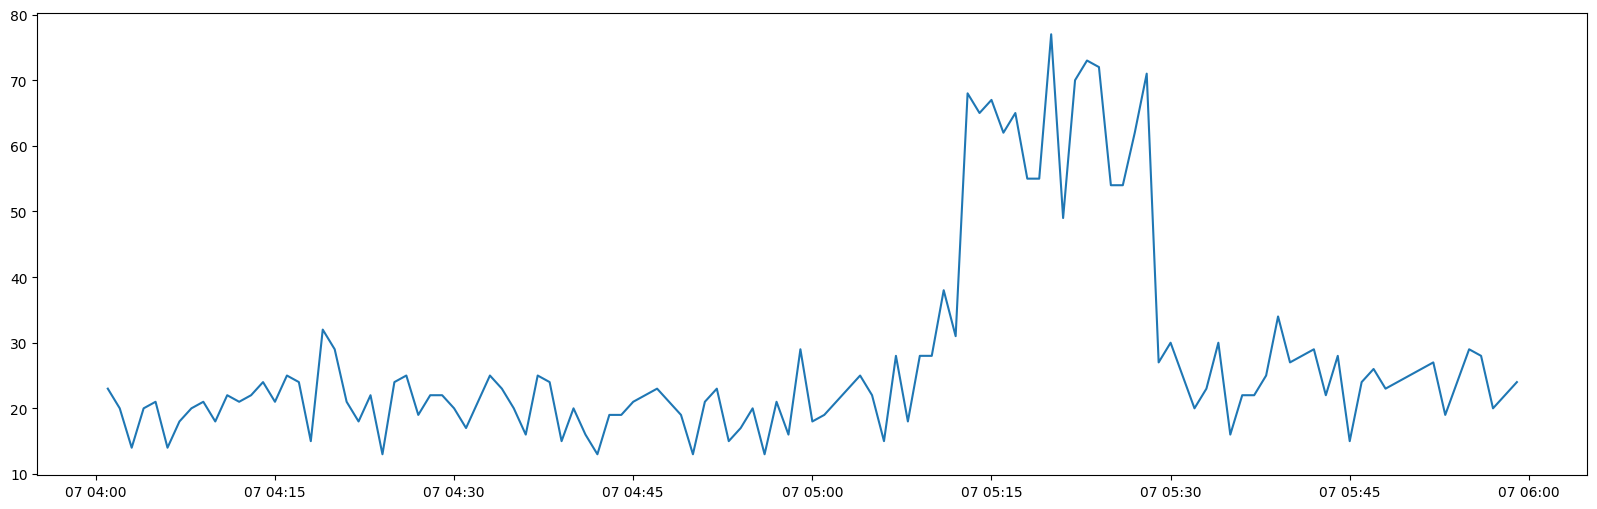

In [100]:
plt.figure(figsize=(20, 6))
plt.plot(second_anom['minute'], second_anom['i_id'])
plt.show()

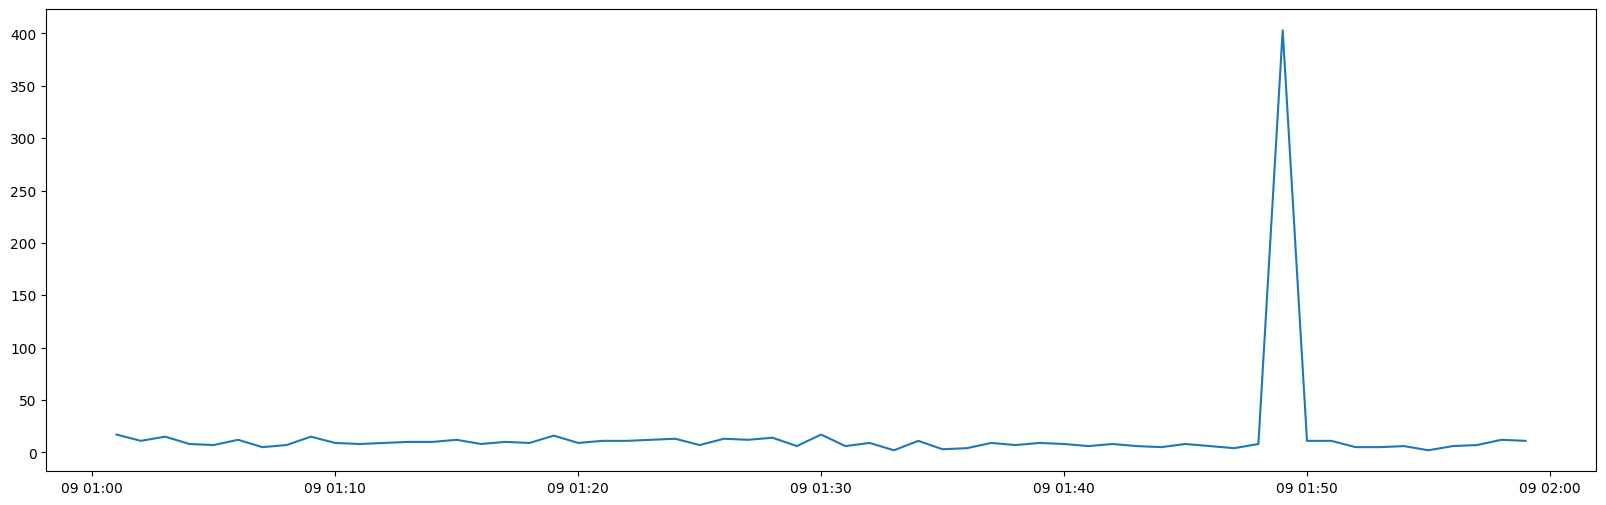

In [101]:
plt.figure(figsize=(20, 6))
plt.plot(third_anom['minute'], third_anom['i_id'])
plt.show()


## Saving data

In [103]:
df_grouped = df_grouped[['i_id','minute']]
df_grouped.rename(columns={'i_id': 'count'}, inplace=True)
df_grouped_test = df_grouped_test[['i_id','minute']]
df_grouped_test.rename(columns={'i_id': 'count'}, inplace=True)
df_grouped.head()

,count,minute
minute,,
2023-07-01 00:00:00,16,2023-07-01 00:00:00
2023-07-01 00:01:00,29,2023-07-01 00:01:00
2023-07-01 00:02:00,16,2023-07-01 00:02:00
2023-07-01 00:03:00,21,2023-07-01 00:03:00
2023-07-01 00:04:00,18,2023-07-01 00:04:00


In [104]:
rasp_train.to_csv('data/tmp/rasp_train.csv')
rasp_test.to_csv('data/tmp/rasp_test.csv')
df_grouped_test.to_csv('data/tmp/df_grouped_test.csv')
df_grouped.to_csv('data/tmp/df_grouped.csv') 